In [4]:
%cd '/mnt/c/Users/malin/Documents/Facultate/honours/UMCG/ICU_Augment_and_Detect'

/mnt/c/Users/malin/Documents/Facultate/honours/UMCG/ICU_Augment_and_Detect


In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import skimage
from augment.face_org import exportImage

In [11]:

def average_blur(img, size):
    kernel = np.ones((size,size),np.float32)/(size*size)
    blurred = cv2.filter2D(img,-1,kernel)
    return blurred

def gaussian_blur(img, size):
    return cv2.GaussianBlur(img,(size,size),0)

def median_filtering(img, size):
    return cv2.medianBlur(img, size)

def bilateral_filtering(img, size):
    return cv2.bilateralFilter(img,size,75,75)

def increase_brightness(img, value):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv)
    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2RGB)
    return img

def adjust_gamma(image, gamma):
   invGamma = 1.0 / gamma
   table = np.array([
      ((i / 255.0) ** invGamma) * 255
      for i in np.arange(0, 256)])
   return cv2.LUT(image.astype(np.uint8), table.astype(np.uint8))


def noise(img, mode):
    return skimage.util.random_noise(img, mode=mode)

def plotimage(img, title, r, c, i):
    plt.subplot(r,c,i)
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")


def plot_all(img):
    noise_types = ["gaussian", "localvar", "poisson", "speckle"]
    gamma_vals = [0.75, 1.25, 1.50]
    blur = [3, 5]
    plt.figure(figsize=(10,10))
    r = 3
    c = 4
    i = 1
    plotimage(img, "original", r,c,i)
    for gamma in gamma_vals:
        i += 1
        gamma = gamma if gamma > 0 else 0.5
        adjusted = adjust_gamma(img, gamma=gamma)
        plotimage(adjusted, "gamma=" + str(gamma), r,c,i)
    for n in noise_types:
        i +=1
        noisy = noise(img, n)
        plotimage(noisy, n, r,c,i)
    for size in blur:
        i += 1
        blurred = gaussian_blur(img, size)
        plotimage(blurred, "gaussian" + str(size), r,c,i)
    for size in blur:
        i += 1
        blurred = bilateral_filtering(img, size)
        plotimage(blurred, "bilateral" + str(size), r,c,i)
    plt.tight_layout()
    plt.savefig("altered_images_plot.png")
    plt.show()
    
def alter_and_save(img, filename):
    noise_types = ["gaussian", "localvar", "poisson", "speckle"]
    gamma_vals = [75, 125, 150]
    blur = [3, 5]
    filename = filename.split(".")[0]
    for gamma in gamma_vals:
        gamma = gamma/100
        gamma = gamma if gamma > 0 else 0.5
        adjusted = adjust_gamma(img, gamma=gamma)
        exportImage("altered", filename, "gamma-"+ str(gamma) + ".png", adjusted)
    for n in noise_types:
        noisy = noise(img, n)
        exportImage("altered", filename, "noisy-" + str(n) + ".png", noisy)
    for size in blur:
        blurred = gaussian_blur(img, size)
        exportImage("altered", filename, "gaussian-"+ str(size) + ".png", blurred)
    for size in blur:
        blurred = bilateral_filtering(img, size)
        exportImage("altered", filename, "bilateral-" + str(size) + ".png", blurred)



In [12]:
if __name__ == "__main__":
    
    for f in os.listdir("data/parsed/sick"):
        if f.startswith('.'):
            continue
        full_path = os.path.join("data/parsed/sick", f)
        if os.path.isfile(full_path):
            print(f)
            img =  cv2.imread(full_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            alter_and_save(img, f)
    print("Finished!\n")

S10s-m_face.png
S10s-m_left.png
S10s-m_mouth.png
S10s-m_right.png
S10s-m_skin.png
S11s-f_face.png
S11s-f_left.png
S11s-f_mouth.png
S11s-f_right.png
S11s-f_skin.png
S12s-m_face.png
S12s-m_left.png
S12s-m_mouth.png
S12s-m_right.png
S12s-m_skin.png
S13s-f_face.png
S13s-f_left.png
S13s-f_mouth.png
S13s-f_right.png
S13s-f_skin.png
S14s-f_face.png
S14s-f_left.png
S14s-f_mouth.png
S14s-f_right.png
S14s-f_skin.png
S15s-m_face.png
S15s-m_left.png
S15s-m_mouth.png
S15s-m_right.png
S15s-m_skin.png
s16s-f_face.png
s16s-f_left.png
s16s-f_mouth.png
s16s-f_right.png
s16s-f_skin.png
s17s-m_face.png
s17s-m_left.png
s17s-m_mouth.png
s17s-m_right.png
s17s-m_skin.png
s18s-f_face.png
s18s-f_left.png
s18s-f_mouth.png
s18s-f_right.png
s18s-f_skin.png
s19s-f_face.png
s19s-f_left.png
s19s-f_mouth.png
s19s-f_right.png
s19s-f_skin.png
s1s-m_face.png
s1s-m_left.png
s1s-m_mouth.png
s1s-m_right.png
s1s-m_skin.png
s20s-f_face.png
s20s-f_left.png
s20s-f_mouth.png
s20s-f_right.png
s20s-f_skin.png
s21s-f_face.png
s21s-

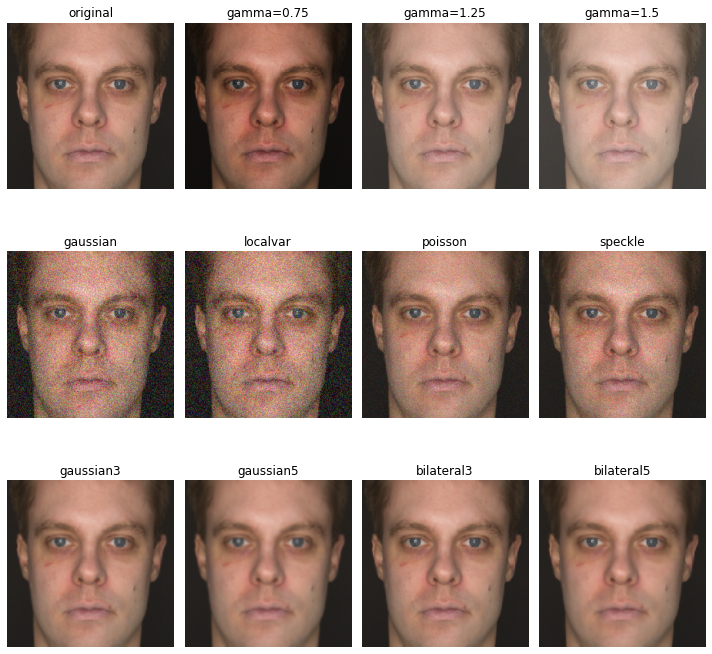

In [70]:
full_path = "data/parsed/sick/s1s-m_face.png"
img =  cv2.imread(full_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plot_all(img)

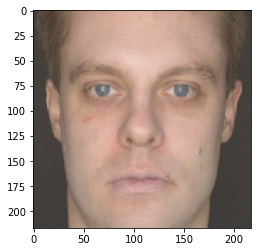

In [6]:
full_path = "data/parsed/altered/s1s-m_face_noisy-speckle.png"
img =  cv2.imread(full_path)
imag = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(imag)